### 1. Load Datasets
Loading test, train and validation sets into pandas dataframe

In [2]:
import pandas as pd

df_train = pd.read_json('data/raw/train.json', lines=True)
df_test = pd.read_json('data/raw/test.json', lines=True)
df_validation = pd.read_json('data/raw/validation.json', lines=True)

### 2. Exploratory Data Analysis (Sayeed, Jui)
#### Analyzing training dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quality_checked  1112 non-null   object
 1   text             1112 non-null   object
 2   task             1112 non-null   object
 3   meta             1112 non-null   object
 4   doc_id           1112 non-null   object
 5   dataset_type     1112 non-null   object
 6   annotator_id     1112 non-null   object
 7   entity_mentions  1112 non-null   object
dtypes: object(8)
memory usage: 69.6+ KB


Observed no null values

In [4]:
df_train.head()

,quality_checked,text,task,meta,doc_id,dataset_type,annotator_id,entity_mentions
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator2,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator8,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator11,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Observation: We do not need dataset_type because the test, train and validation files are already separate. We also do not need the columns quality_checked, annotator_id.

Dropping unrequired columns.

In [5]:
df_train.drop(columns=['quality_checked', 'dataset_type', 'annotator_id'])

,text,task,meta,doc_id,entity_mentions
0,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
...,...,...,...,...,...
1107,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Helmut Ludescher', 'articles': ...",001-60002,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1108,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'J. Peter', 'articles': [91, 34,...",001-146353,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1109,PROCEDURE\n\nThe case was referred to the Cour...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Christopher Ian Scott', 'articl...",001-58010,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1110,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henryk Kreuz', 'articles': [91,...",001-61921,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Analyzing task column

In [6]:
df_train['task'].unique()

array(['Task: Annotate the document to anonymise the following person: Henrik Hasslund',
       'Task: Annotate the document to anonymise the following person: D. Stępniak',
       'Task: Annotate the document to anonymise the following person: Nusret Amutgan',
       ...,
       'Task: Annotate the document to anonymise the following person: J. Peter',
       'Task: Annotate the document to anonymise the following person: Christopher Ian Scott',
       'Task: Annotate the document to anonymise the following person: Yiannis Kyriakou'],
      dtype=object)

Observation: we don't need the task column

Finding out how many unique values are there in text column and doc_id column. Making sure they match.

In [7]:
len(df_train['text'].unique())

1014

In [8]:
len(df_train['doc_id'].unique())

1014

Observation: We have 1014 unique values for documents but the dataset has 1112 entries. So there might be duplicates.

In [9]:
df_train['meta'][0]

{'applicant': 'Henrik Hasslund',
 'articles': [91, 34, 54, 34, 93],
 'countries': 'DNK',
 'legal_branch': 'CHAMBER',
 'year': 2008}

Observation: We may be able to reserve this column for later evaluation. Might be helpful to find out if our model struggles with region specific names, or has a bias, etc.

In [10]:
df_train_meta = df_train[['text', 'meta', 'doc_id']].copy()
df_train_meta.head()

,text,meta,doc_id
0,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
1,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
2,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
3,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
4,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741


In [11]:
df_train_meta.to_csv('data/processed/train_meta.csv')

In [12]:
df_test_meta = df_test[['text', 'meta', 'doc_id']].copy()
df_test_meta.to_csv('data/processed/test_meta.csv')

df_validation_meta = df_validation[['text', 'meta', 'doc_id']].copy()
df_validation_meta.to_csv('data/processed/validation_meta.csv')

Exploring entity mentions column

In [13]:
df_train['entity_mentions'][1]

[{'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 62,
  'entity_id': '001-90194_a2_e1',
  'entity_mention_id': '001-90194_a2_em1',
  'entity_type': 'CODE',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': '36244/06',
  'start_offset': 54},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'correct',
  'end_offset': 94,
  'entity_id': '001-90194_a2_e2',
  'entity_mention_id': '001-90194_a2_em2',
  'entity_type': 'ORG',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Kingdom of Denmark',
  'start_offset': 76},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 242,
  'entity_id': '001-90194_a2_e3',
  'entity_mention_id': '001-90194_a2_em3',
  'entity_type': 'DEM',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Danish',
  'start_offset': 236},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 271,
  '

In [14]:
import json
df_train_exploded = df_train.explode('entity_mentions')
entities_flat = pd.json_normalize(df_train_exploded['entity_mentions'])
df_train_entities = pd.concat([df_train_exploded[['doc_id']].reset_index(drop=True), entities_flat.reset_index(drop=True)], axis=1)

df_train_entities.head()

,doc_id,confidential_status,edit_type,end_offset,entity_id,entity_mention_id,entity_type,identifier_type,related_mentions,span_text,start_offset
0,001-90194,NOT_CONFIDENTIAL,check,62,001-90194_a1_e1,001-90194_a1_em1,CODE,DIRECT,None,36244/06,54
1,001-90194,NOT_CONFIDENTIAL,correct,94,001-90194_a1_e2,001-90194_a1_em2,ORG,NO_MASK,None,Kingdom of Denmark,76
2,001-90194,NOT_CONFIDENTIAL,check,242,001-90194_a1_e3,001-90194_a1_em3,DEM,NO_MASK,None,Danish,236
3,001-90194,NOT_CONFIDENTIAL,check,271,001-90194_a1_e4,001-90194_a1_em4,PERSON,DIRECT,None,Mr Henrik Hasslund,253
4,001-90194,NOT_CONFIDENTIAL,check,308,001-90194_a1_e5,001-90194_a1_em5,DATETIME,QUASI,None,31 August 2006,294


Observation: We have start_offset, end_offset and entity_type. We need to extract this data to create a token and tags for finetuning DistilliBERT model.

Checking the counts of entities for filtered set where identifier_type is not NO_MASK

Entity Type Counts:


<Axes: title={'center': 'Distribution of Entity Types'}, xlabel='entity_type'>

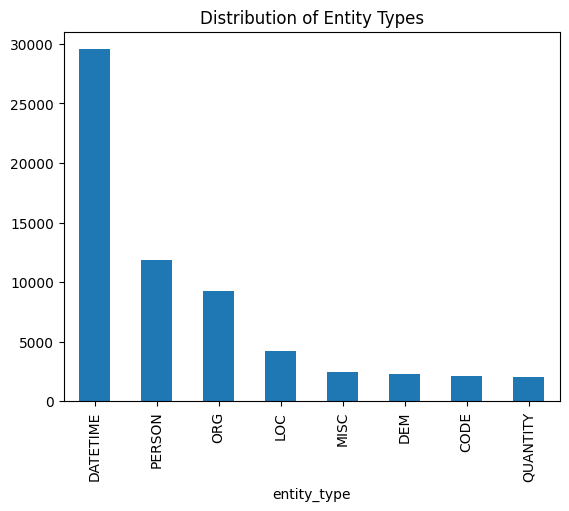

In [15]:
print("Entity Type Counts:")
entity_type_stats = df_train_entities[df_train_entities['identifier_type'] != 'NO_MASK']['entity_type'].value_counts()
entity_type_stats.plot(kind='bar', title='Distribution of Entity Types')

Certain imbalance of data is seen here where datetime entities are much higher in count than quantity or code

<Axes: title={'center': 'Distribution of Masking Needs'}, xlabel='identifier_type'>

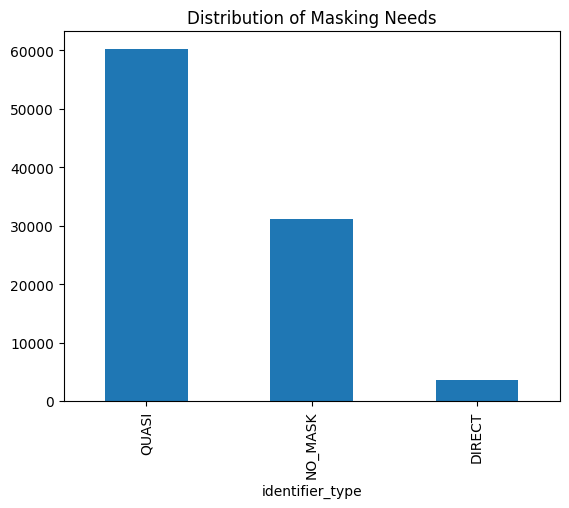

In [16]:
# Check masking requirements
mask_stats = df_train_entities['identifier_type'].value_counts()
mask_stats.plot(kind='bar', title='Distribution of Masking Needs')

<Axes: title={'center': 'Entities per Document Distribution'}, xlabel='Number of Entities', ylabel='Number of Documents'>

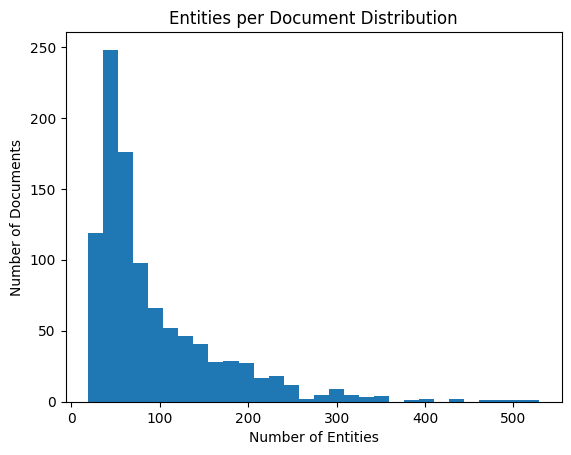

In [17]:
entities_per_doc = df_train_entities.groupby('doc_id').size().sort_values(ascending=False)
entities_per_doc.plot(kind='hist', bins=30, title='Entities per Document Distribution', xlabel='Number of Entities', ylabel='Number of Documents')

In [18]:
print(f"Average entities per document: {entities_per_doc.mean():.2f}")

Average entities per document: 93.72


### 3. Data pre-processing (Jui)
Converting offests to list

In [19]:
def convert_offsets_to_lists(row):
    text = row['text']
    entities = row['entity_mentions']

    # create character-level map
    char_tags = ["O"] * len(text)

    for ent in entities:
        # Filter 'NO_MASK' entities
        if ent.get('identifier_type') == 'NO_MASK':
            continue

        start, end = ent['start_offset'], ent['end_offset']
        label = ent['entity_type']

        # fill character-level map
        if start < len(text) and end <= len(text):
            char_tags[start] = f"B-{label}" # beginning of entity
            for i in range(start+1, end):
                char_tags[i] = f"I-{label}" # inside entity

    # convert character map to word - tag
    tokens = text.split()
    ner_tags = []

    cursor = 0
    for token in tokens:
        # advance cursor to the start of word (skipping spaces)
        while cursor < len(text) and text[cursor].isspace():
            cursor += 1

        # tag of the word is the tag of its first character
        if cursor < len(text):
            ner_tags.append(char_tags[cursor])
            cursor += len(token)
        else:
            ner_tags.append("O")

    return {"tokens": tokens, "ner_tags": ner_tags}

In [20]:
from datasets import Dataset

# converting Pandas to Hugging Face Dataset
hf_train = Dataset.from_pandas(df_train)
train_processed = hf_train.map(convert_offsets_to_lists)

# Quick Check:
print(train_processed[0]['tokens'])
print(train_processed[0]['ner_tags'])

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

['PROCEDURE', 'The', 'case', 'originated', 'in', 'an', 'application', '(no.', '36244/06)', 'against', 'the', 'Kingdom', 'of', 'Denmark', 'lodged', 'with', 'the', 'Court', 'under', 'Article', '34', 'of', 'the', 'Convention', 'for', 'the', 'Protection', 'of', 'Human', 'Rights', 'and', 'Fundamental', 'Freedoms', '(“the', 'Convention”)', 'by', 'a', 'Danish', 'national,', 'Mr', 'Henrik', 'Hasslund', '(“the', 'applicant”),', 'on', '31', 'August', '2006.', 'The', 'applicant', 'was', 'represented', 'by', 'Mr', 'Tyge', 'Trier,', 'a', 'lawyer', 'practising', 'in', 'Copenhagen.', 'The', 'Danish', 'Government', '(“the', 'Government”)', 'were', 'represented', 'by', 'their', 'Agent,', 'Ms', 'Nina', 'Holst-Christensen', 'of', 'the', 'Ministry', 'of', 'Justice.', 'On', '5', 'September', '2007', 'the', 'Acting', 'President', 'of', 'the', 'Fifth', 'Section', 'decided', 'to', 'give', 'notice', 'of', 'the', 'application', 'to', 'the', 'Government.', 'It', 'was', 'also', 'decided', 'to', 'rule', 'on', 'the

Create label mappings from train set to be used to pass when training the model, same mappings would be used during tokenization of test and validation sets as well

In [21]:
# extracting unique tags from training data
unique_tags = set(tag for row in train_processed for tag in row['ner_tags'])
label_list = sorted(list(unique_tags)) # e.g., ['B-LOC', 'B-PER', 'I-PER', 'O']

# createing maps
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}

print(f"Number of labels: {len(label_list)}")
print(label2id)

Number of labels: 17
{'B-CODE': 0, 'B-DATETIME': 1, 'B-DEM': 2, 'B-LOC': 3, 'B-MISC': 4, 'B-ORG': 5, 'B-PERSON': 6, 'B-QUANTITY': 7, 'I-CODE': 8, 'I-DATETIME': 9, 'I-DEM': 10, 'I-LOC': 11, 'I-MISC': 12, 'I-ORG': 13, 'I-PERSON': 14, 'I-QUANTITY': 15, 'O': 16}


Using AutoTokenizer to handle sub-words and align new tags. Defining tokenization function to be used various versions of BERT

In [22]:
def tokenize_and_align(examples, tokenizer):
  '''Takes the tokenizer object as input and operated on a row in huggingface dataset object'''
  # split words into sub-words
  tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

  labels = []
  for i, label in enumerate(examples["ner_tags"]):
      word_ids = tokenized_inputs.word_ids(batch_index=i) #supported only for fast tokenizers
      previous_word_idx = None
      label_ids = []
      for word_idx in word_ids:
          if word_idx is None:
              # special tokens like [CLS] get -100 (ignored)
              label_ids.append(-100)
          elif word_idx != previous_word_idx:
              # first piece of a word gets the real label ID
              label_ids.append(label2id[label[word_idx]]) #using map created from training set
          else:
              # subsequent pieces (e.g., "##lor") get -100 (ignored)
              label_ids.append(-100)
          previous_word_idx = word_idx
      labels.append(label_ids)

  tokenized_inputs["labels"] = labels
  return tokenized_inputs

Writing a script for processing test and validation sets

In [23]:
def preprocess_data(df, tokenizer):
  '''Takes a pandas dataframe and a tokenizer object and returns a tokenized huggingface dataset object ready to be passed into BERT for training
  '''
  # converting Pandas to Hugging Face Dataset
  hf = Dataset.from_pandas(df)
  processed = hf.map(convert_offsets_to_lists)
  #tokenize
  tokenized = processed.map(tokenize_and_align, batched=True, fn_kwargs={"tokenizer": tokenizer})

  return tokenized

Importing AutoTokenizer to use various BERT tokenizers

In [24]:
from transformers import AutoTokenizer

## 4. Bi-LSTM (Jui)

Using DistilBERT tokenizer to keep the comparison fair

In [25]:
tokenizer_distilbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [26]:
train_distilbert = preprocess_data(df_train ,tokenizer_distilbert)

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

In [27]:
test_distilbert = preprocess_data(df_test, tokenizer_distilbert)
validation_distilbert = preprocess_data(df_validation, tokenizer_distilbert)

Map:   0%|          | 0/555 [00:00<?, ? examples/s]

Map:   0%|          | 0/555 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

Importing pyTorch

In [28]:
import torch
import torch.nn as nn

In [29]:
#setup GPU availability
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

Defining the Bi-LSTM model for NER

In [52]:
class bilstm_nre(nn.Module):
  def __init__(self, vocab_size, num_labels, embed_dim=128, hidden_dim=256, weight_tensor=None, dropout_rate=None):
      super().__init__()

      #setting up a custom embedding layer
      #seting padding index to 0 the embedding model from learning vectors for padding
      self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)

      #bi-lstm layer
      self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)

      #dropout
      if dropout_rate is not None:
        self.dropout = nn.Dropout(dropout_rate)

      #output layer (2*hidden_dim for bi-lstm)
      self.classifier = nn.Linear(hidden_dim * 2, num_labels)

      #set loss function (ignore_index=-100 because we set masking to -100 in previous function)
      if weight_tensor is not None:
        self.loss_fct = nn.CrossEntropyLoss(ignore_index=-100, weight=weight_tensor)
      else:
        self.loss_fct = nn.CrossEntropyLoss(ignore_index=-100)

  #forward pass
  def forward(self, input_ids, labels=None):
      #embed
      embeds = self.embedding(input_ids)

      #lstm forward
      lstm_out, _ = self.lstm(embeds)

      logits = self.classifier(lstm_out)

      #loss calculation
      loss = None
      if labels is not None:
          # Flatten the tensors so we can check every token at once
          # logits shape: (batch * seq_len, num_labels)
          # labels shape: (batch * seq_len)
          loss = self.loss_fct(logits.view(-1, logits.shape[-1]), labels.view(-1))

      return loss, logits

batch pre-processing function to prepare dataloaders

In [31]:
def collate_fn(batch):
    # convert batch to tensors
    input_ids = [torch.tensor(item['input_ids']) for item in batch]
    labels = [torch.tensor(item['labels']) for item in batch]

    # padding inputs with 0(blank space), labels with -100
    input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=0)
    labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value=-100)

    return input_ids.to(device), labels.to(device)

In [32]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_distilbert, batch_size=16, shuffle=True, collate_fn=collate_fn)

In [33]:
test_loader = DataLoader(test_distilbert, batch_size=16, shuffle=True, collate_fn=collate_fn)
validation_loader = DataLoader(validation_distilbert, batch_size=16, shuffle=True, collate_fn=collate_fn)

Tracking model performance at every epoch

In [34]:
#using huggingface evaluate library for NER evaluation
!pip install evaluate seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=b7cf57ae908c0f9adff6cf5bb8ddb236c47ede6d12addf74a96d8bde2727a287
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [35]:
import matplotlib.pyplot as plt
import evaluate
import numpy as np

Function to evaluate after every epoch

In [36]:
seqeval = evaluate.load("seqeval")

def evaluate_epoch(model, dataloader, label_list):
    model.eval() # Set to evaluation mode

    all_preds = []
    all_labels = []
    total_val_loss = 0

    with torch.no_grad():
        for batch_ids, batch_labels in dataloader:
            batch_ids = batch_ids.to(device)
            batch_labels = batch_labels.to(device)

            # Forward pass
            loss, logits = model(batch_ids, batch_labels)

            # test loss
            total_val_loss += loss.item()

            # Get predictions (argmax)
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            labels = batch_labels.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    #calculate validation loss
    avg_val_loss = total_val_loss / len(dataloader)

    # convert IDs back to Tags (removing -100)
    decoded_preds = [
        [label_list[p] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(all_preds, all_labels)
    ]
    decoded_labels = [
        [label_list[l] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(all_preds, all_labels)
    ]

    # compute metrics using seqeval (Strict Entity-Level scoring)
    results = seqeval.compute(predictions=decoded_preds, references=decoded_labels)

    return {
        "val_loss": avg_val_loss,
        "accuracy": results["overall_accuracy"],
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"]
    }

Function for training loop with evaluation metric after each epoch

In [48]:
def train_eval_lstm(model, optimizer, n_epoches = 5):
  print("Starting Bi-LSTM for NER training...")

  history = {
      "train_loss": [],
      "val_loss": [],
      "accuracy": [],
      "precision": [],
      "recall": [],
      "f1": []
  }

  for epoch in range(n_epoches):
      # train
      model.train()
      total_loss = 0

      for batch_ids, batch_labels in train_loader:
          optimizer.zero_grad()
          loss, logits = model(batch_ids, batch_labels)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_train_loss = total_loss / len(train_loader)

      # validation on test set to calculate metrics
      metrics = evaluate_epoch(model, test_loader, label_list)

      # tracking history of metrics
      history["train_loss"].append(avg_train_loss)
      history["val_loss"].append(metrics["val_loss"])
      history["accuracy"].append(metrics["accuracy"])
      history["precision"].append(metrics["precision"])
      history["recall"].append(metrics["recall"])
      history["f1"].append(metrics["f1"])

      print(f"Epoch {epoch+1}/{n_epoches} | "
            f"Train Loss: {avg_train_loss:.4f} | "
            f"Test Loss: {metrics['val_loss']:.4f} | "
            f"Test Recall: {metrics['recall']:.4f} | "
            f"Test Precision: {metrics['precision']:.4f} |"
            f"Test F1: {metrics['f1']:.4f} |"
            f"Test Accuracy: {metrics['accuracy']:.4f}")

  print("Training complete!")
  return history

function for plotting the evaluation metrics vs epoch

In [38]:
def plot_training_metrics(history):
    epochs_range = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 6))

    # training vs testing loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history['train_loss'], 'r-o', label='Training Loss')
    plt.plot(epochs_range, history['val_loss'], 'b-o', label='Testing Loss')
    plt.title('Training Loss vs Testing Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # R vs P vs A vs F1
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history['recall'], 'b-o', label='Val Recall')
    plt.plot(epochs_range, history['f1'], 'g-o', label='Val F1 Score')
    plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')
    plt.plot(epochs_range, history['precision'], 'g-o', label='Precision')
    plt.title('Test R vs P vs A vs F1')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.ylim(0, 1.0) # y-axis to 0-100%
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Training & Evaluation LSTM model v1

In [39]:
# vocab_size is 30522 for DistilBERT
# num_labels is len(label_list)
lstm_nre_v1 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256).to(device)
optimizer_v1 = torch.optim.Adam(lstm_nre_v1.parameters(), lr=1e-4)

In [40]:
history_v1 = train_eval_lstm(lstm_nre_v1, optimizer_v1, n_epoches = 10)

Starting Bi-LSTM for NER training...


/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10 | Train Loss: 1.8729 | Test Loss: 0.6817 | Test Recall: 0.0000 | Test Precision: 0.0000 |Test F1: 0.0000 |Test Accuracy: 0.8715
Epoch 2/10 | Train Loss: 0.6427 | Test Loss: 0.5767 | Test Recall: 0.0000 | Test Precision: 0.0000 |Test F1: 0.0000 |Test Accuracy: 0.8716
Epoch 3/10 | Train Loss: 0.5585 | Test Loss: 0.5027 | Test Recall: 0.0004 | Test Precision: 0.0157 |Test F1: 0.0007 |Test Accuracy: 0.8723
Epoch 4/10 | Train Loss: 0.4750 | Test Loss: 0.4252 | Test Recall: 0.0615 | Test Precision: 0.1539 |Test F1: 0.0879 |Test Accuracy: 0.9000
Epoch 5/10 | Train Loss: 0.3945 | Test Loss: 0.3642 | Test Recall: 0.1729 | Test Precision: 0.3793 |Test F1: 0.2376 |Test Accuracy: 0.9151
Epoch 6/10 | Train Loss: 0.3392 | Test Loss: 0.3265 | Test Recall: 0.3036 | Test Precision: 0.5818 |Test F1: 0.3990 |Test Accuracy: 0.9299
Epoch 7/10 | Train Loss: 0.3006 | Test Loss: 0.2978 | Test Recall: 0.3677 | Test Precision: 0.6504 |Test F1: 0.4698 |Test Accuracy: 0.9352
Epoch 8/10 | Train Loss: 0.

/tmp/ipython-input-483565873.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


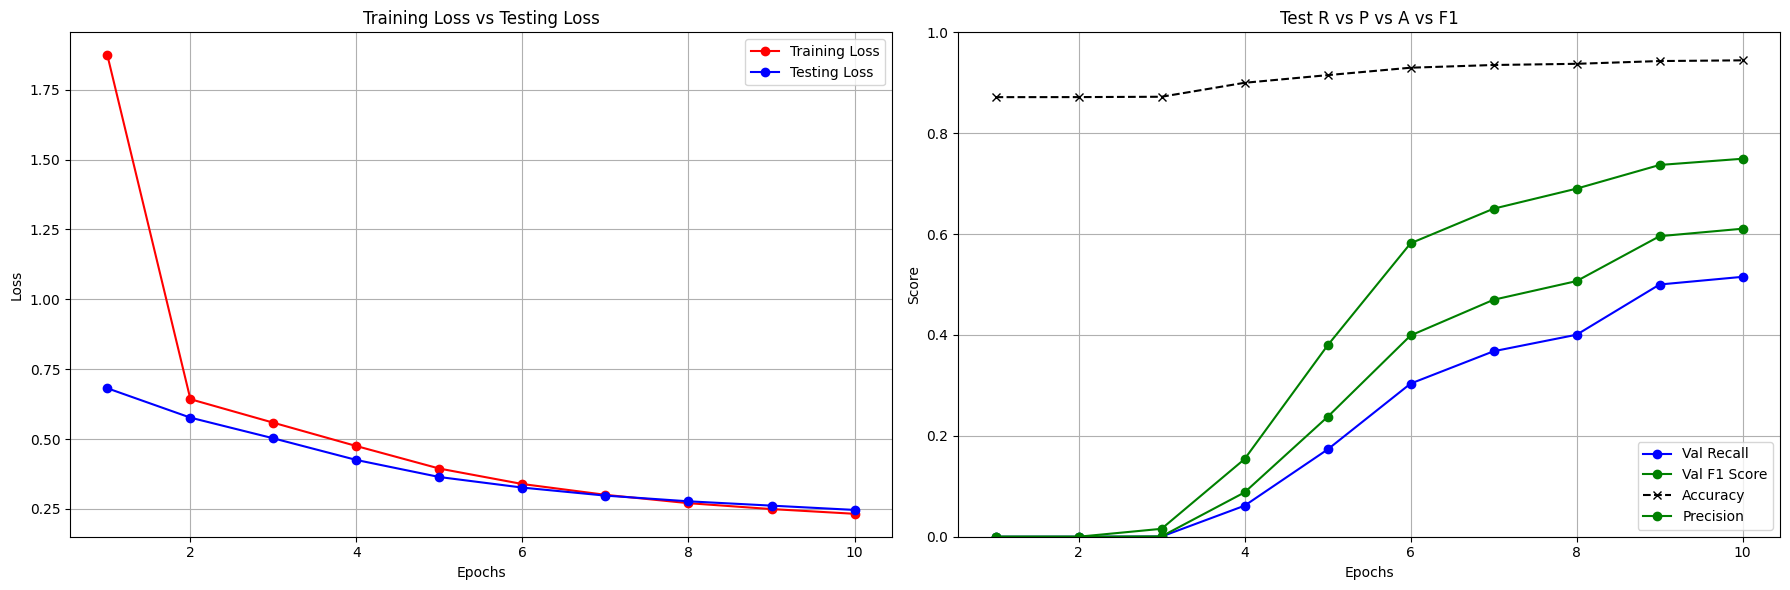

In [41]:
# plot evaluation metrics
plot_training_metrics(history_v1)

Observation: Model is doing fine till epoch 9. After epoch 10, a slight overfitting is seen. Also, a high accuracy of 94.45% with a low recall and precision of 51.53% shows that the model has learnt that predicting non-entity (label 'O') most of the times is a safe bet.

Implementing weighted loss strategy to tell the model that missing an entity is worst than getting a non-entity wrong.

To calculate weights, if the tag occurs more number of times like the non-entity tag 'O', we need to give it lower weight. Using sklearn class_weight utility to compute this.

In [40]:
from sklearn.utils.class_weight import compute_class_weight
#list of all tags in training set
all_classes = [label
              for row in train_distilbert['labels']
                for label in row
                  if label != -100
]
unique_classes = np.unique(all_classes)

#balanced mode adjusts the weights inversly proportional to the frequencies of the classes
weights = compute_class_weight(class_weight='balanced', classes = unique_classes, y = all_classes)

#convert class weights to pytorch tensor
class_weights = torch.tensor(weights, dtype=torch.float).to(device)

print("Calculated Class Weights:")
for i, weight in enumerate(class_weights):
    # getting label names from id2label
    label_name = id2label[i] if 'id2label' in locals() else str(i)
    print(f"{label_name}: {weight:.4f}")

Calculated Class Weights:
B-CODE: 15.6851
B-DATETIME: 2.4340
B-DEM: 33.6022
B-LOC: 13.7717
B-MISC: 68.8216
B-ORG: 9.5366
B-PERSON: 5.0459
B-QUANTITY: 45.8811
I-CODE: 504.6920
I-DATETIME: 1.4053
I-DEM: 54.5324
I-LOC: 41.7168
I-MISC: 19.3093
I-ORG: 4.0306
I-PERSON: 2.7905
I-QUANTITY: 30.2104
O: 0.0683


In [41]:
#trying similar architecture with weighted loss approach
lstm_nre_v2 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256, weight_tensor=class_weights).to(device)
optimizer_v2 = torch.optim.Adam(lstm_nre_v2.parameters(), lr=1e-4)

In [42]:
history_v2 = train_eval_lstm(lstm_nre_v2, optimizer_v2, n_epoches = 10)

Starting Bi-LSTM for NER training...
Epoch 1/10 | Train Loss: 2.7373 | Test Loss: 2.6478 | Test Recall: 0.2824 | Test Precision: 0.0248 |Test F1: 0.0455 |Test Accuracy: 0.3313
Epoch 2/10 | Train Loss: 2.4388 | Test Loss: 2.2394 | Test Recall: 0.3527 | Test Precision: 0.0407 |Test F1: 0.0729 |Test Accuracy: 0.4568
Epoch 3/10 | Train Loss: 1.9038 | Test Loss: 1.7950 | Test Recall: 0.2853 | Test Precision: 0.0353 |Test F1: 0.0629 |Test Accuracy: 0.4125
Epoch 4/10 | Train Loss: 1.5326 | Test Loss: 1.6091 | Test Recall: 0.3438 | Test Precision: 0.0446 |Test F1: 0.0789 |Test Accuracy: 0.4266
Epoch 5/10 | Train Loss: 1.3258 | Test Loss: 1.5575 | Test Recall: 0.3569 | Test Precision: 0.0502 |Test F1: 0.0880 |Test Accuracy: 0.4216
Epoch 6/10 | Train Loss: 1.1903 | Test Loss: 1.4629 | Test Recall: 0.4006 | Test Precision: 0.0632 |Test F1: 0.1091 |Test Accuracy: 0.5133
Epoch 7/10 | Train Loss: 1.0811 | Test Loss: 1.3390 | Test Recall: 0.4605 | Test Precision: 0.0663 |Test F1: 0.1159 |Test Accurac

/tmp/ipython-input-483565873.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


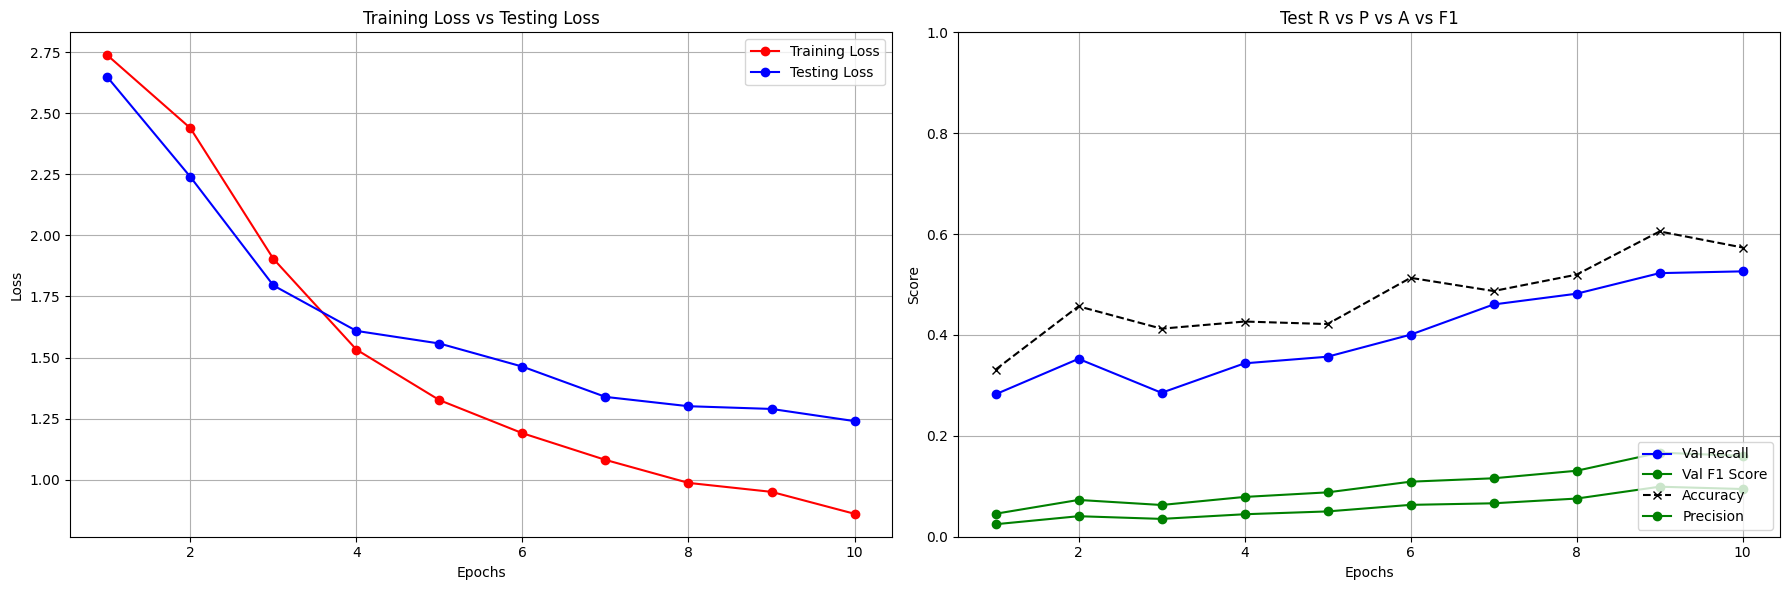

In [43]:
# plot evaluation metrics
plot_training_metrics(history_v2)

Observed that the model starts to overfit at epoch 4. The recall has improved to 52.61% the precision has drastically dropped to 9.46%, showing that only 9.46% of the redacted words are actually sensetive! The accuracy has also dropped to 57.34%.

What effect might it have if capacity of the network is increased?

In [44]:
#increasing dimension of hidden layer without using weighted loss
lstm_nre_v3 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=288).to(device)
optimizer_v3 = torch.optim.Adam(lstm_nre_v3.parameters(), lr=1e-4)

In [45]:
history_v3 = train_eval_lstm(lstm_nre_v3, optimizer_v3, n_epoches = 10)

Starting Bi-LSTM for NER training...


/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10 | Train Loss: 1.7759 | Test Loss: 0.6347 | Test Recall: 0.0000 | Test Precision: 0.0000 |Test F1: 0.0000 |Test Accuracy: 0.8715
Epoch 2/10 | Train Loss: 0.6266 | Test Loss: 0.5587 | Test Recall: 0.0004 | Test Precision: 0.2000 |Test F1: 0.0007 |Test Accuracy: 0.8715
Epoch 3/10 | Train Loss: 0.5417 | Test Loss: 0.4737 | Test Recall: 0.0038 | Test Precision: 0.0289 |Test F1: 0.0067 |Test Accuracy: 0.8788
Epoch 4/10 | Train Loss: 0.4416 | Test Loss: 0.3880 | Test Recall: 0.1256 | Test Precision: 0.2985 |Test F1: 0.1768 |Test Accuracy: 0.9075
Epoch 5/10 | Train Loss: 0.3642 | Test Loss: 0.3336 | Test Recall: 0.2987 | Test Precision: 0.6003 |Test F1: 0.3989 |Test Accuracy: 0.9263
Epoch 6/10 | Train Loss: 0.3107 | Test Loss: 0.2980 | Test Recall: 0.3536 | Test Precision: 0.6491 |Test F1: 0.4578 |Test Accuracy: 0.9328
Epoch 7/10 | Train Loss: 0.2759 | Test Loss: 0.2728 | Test Recall: 0.4321 | Test Precision: 0.7069 |Test F1: 0.5364 |Test Accuracy: 0.9389
Epoch 8/10 | Train Loss: 0.

/tmp/ipython-input-483565873.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


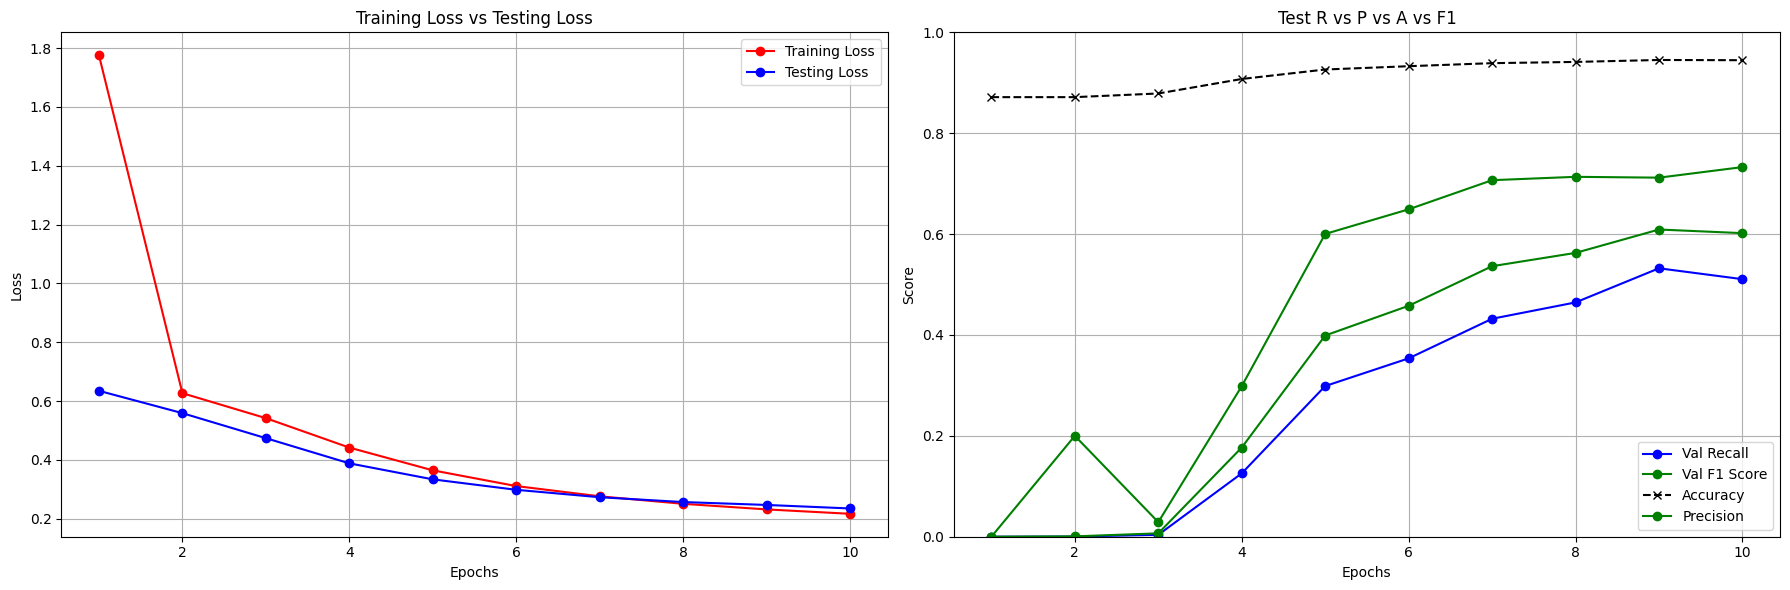

In [46]:
# plot evaluation metrics
plot_training_metrics(history_v3)

Observation: Accuracy remained very high at about 94.52% but a slight boost in recall at 53.22% was observed.

Trying to increase capacity further.

In [39]:
#increasing dimension of hidden layer without using weighted loss
lstm_nre_v4 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=416).to(device)
optimizer_v4 = torch.optim.Adam(lstm_nre_v4.parameters(), lr=1e-4)

In [40]:
history_v4 = train_eval_lstm(lstm_nre_v4, optimizer_v4, n_epoches = 10)

Starting Bi-LSTM for NER training...


/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10 | Train Loss: 1.5199 | Test Loss: 0.6161 | Test Recall: 0.0000 | Test Precision: 0.0000 |Test F1: 0.0000 |Test Accuracy: 0.8715
Epoch 2/10 | Train Loss: 0.5867 | Test Loss: 0.5164 | Test Recall: 0.0000 | Test Precision: 0.0000 |Test F1: 0.0000 |Test Accuracy: 0.8722
Epoch 3/10 | Train Loss: 0.4706 | Test Loss: 0.4092 | Test Recall: 0.1380 | Test Precision: 0.3589 |Test F1: 0.1993 |Test Accuracy: 0.9029
Epoch 4/10 | Train Loss: 0.3760 | Test Loss: 0.3469 | Test Recall: 0.3125 | Test Precision: 0.5909 |Test F1: 0.4088 |Test Accuracy: 0.9271
Epoch 5/10 | Train Loss: 0.3174 | Test Loss: 0.3041 | Test Recall: 0.3536 | Test Precision: 0.6400 |Test F1: 0.4555 |Test Accuracy: 0.9321
Epoch 6/10 | Train Loss: 0.2789 | Test Loss: 0.2776 | Test Recall: 0.4272 | Test Precision: 0.6973 |Test F1: 0.5298 |Test Accuracy: 0.9382
Epoch 7/10 | Train Loss: 0.2517 | Test Loss: 0.2581 | Test Recall: 0.4946 | Test Precision: 0.7145 |Test F1: 0.5845 |Test Accuracy: 0.9425
Epoch 8/10 | Train Loss: 0.

/tmp/ipython-input-483565873.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


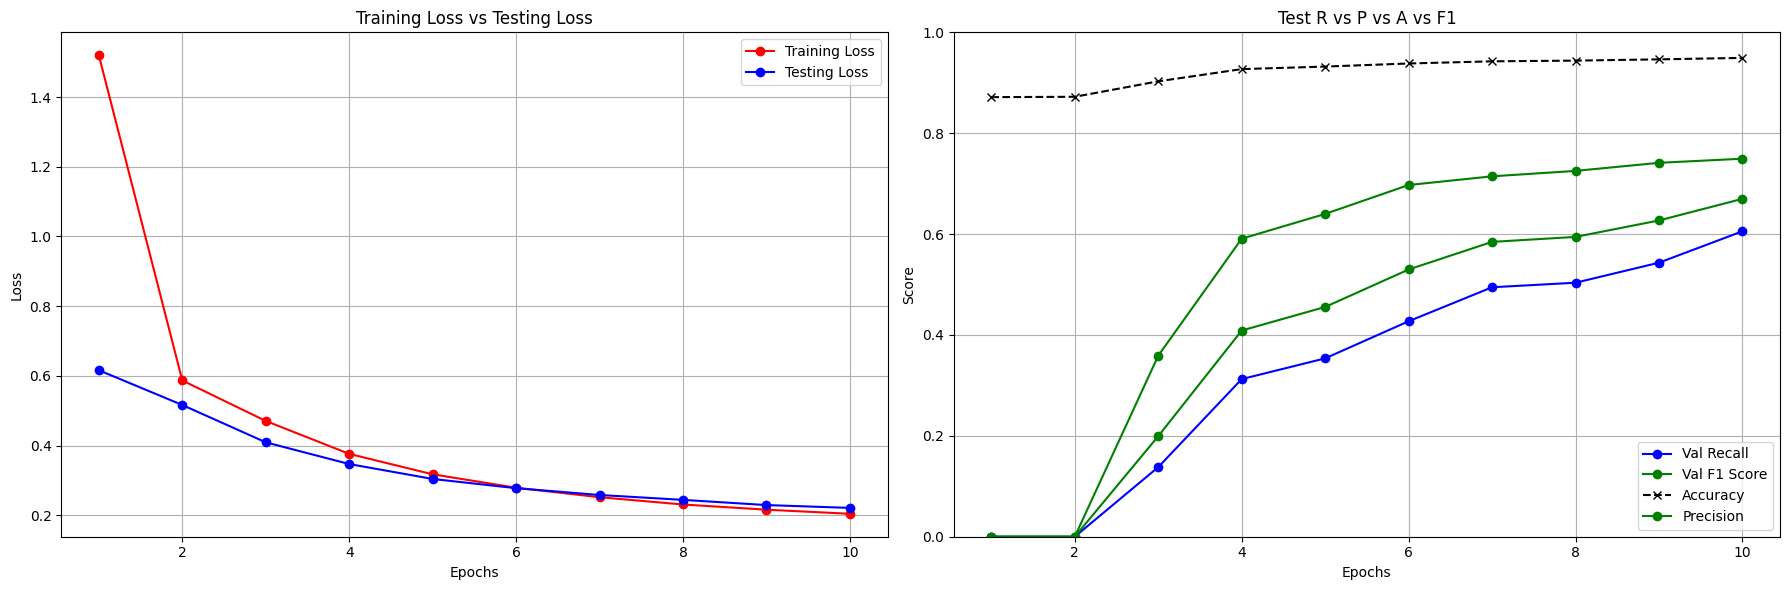

In [41]:
# plot evaluation metrics
plot_training_metrics(history_v4)

Observation: Increasing capacity significantly is enabling the model to learn well. The model is starting to show a slight overfit at epoch 7. While accuracy is still high at 94.93%, the test R has increased to 60.56% and test F1 to 66.99%

Exploring if extending the training process increases model performance further.

In [42]:
history_v4_1 = train_eval_lstm(lstm_nre_v4, optimizer_v4, n_epoches = 20)

Starting Bi-LSTM for NER training...
Epoch 1/20 | Train Loss: 0.1952 | Test Loss: 0.2160 | Test Recall: 0.6636 | Test Precision: 0.7525 |Test F1: 0.7052 |Test Accuracy: 0.9526
Epoch 2/20 | Train Loss: 0.1871 | Test Loss: 0.2058 | Test Recall: 0.6355 | Test Precision: 0.7941 |Test F1: 0.7060 |Test Accuracy: 0.9525
Epoch 3/20 | Train Loss: 0.1789 | Test Loss: 0.2010 | Test Recall: 0.6595 | Test Precision: 0.7778 |Test F1: 0.7138 |Test Accuracy: 0.9541
Epoch 4/20 | Train Loss: 0.1732 | Test Loss: 0.2019 | Test Recall: 0.6581 | Test Precision: 0.7680 |Test F1: 0.7088 |Test Accuracy: 0.9530
Epoch 5/20 | Train Loss: 0.1669 | Test Loss: 0.1999 | Test Recall: 0.6387 | Test Precision: 0.8092 |Test F1: 0.7139 |Test Accuracy: 0.9537
Epoch 6/20 | Train Loss: 0.1622 | Test Loss: 0.1914 | Test Recall: 0.6617 | Test Precision: 0.7935 |Test F1: 0.7216 |Test Accuracy: 0.9556
Epoch 7/20 | Train Loss: 0.1574 | Test Loss: 0.1881 | Test Recall: 0.6766 | Test Precision: 0.7854 |Test F1: 0.7270 |Test Accurac

/tmp/ipython-input-483565873.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


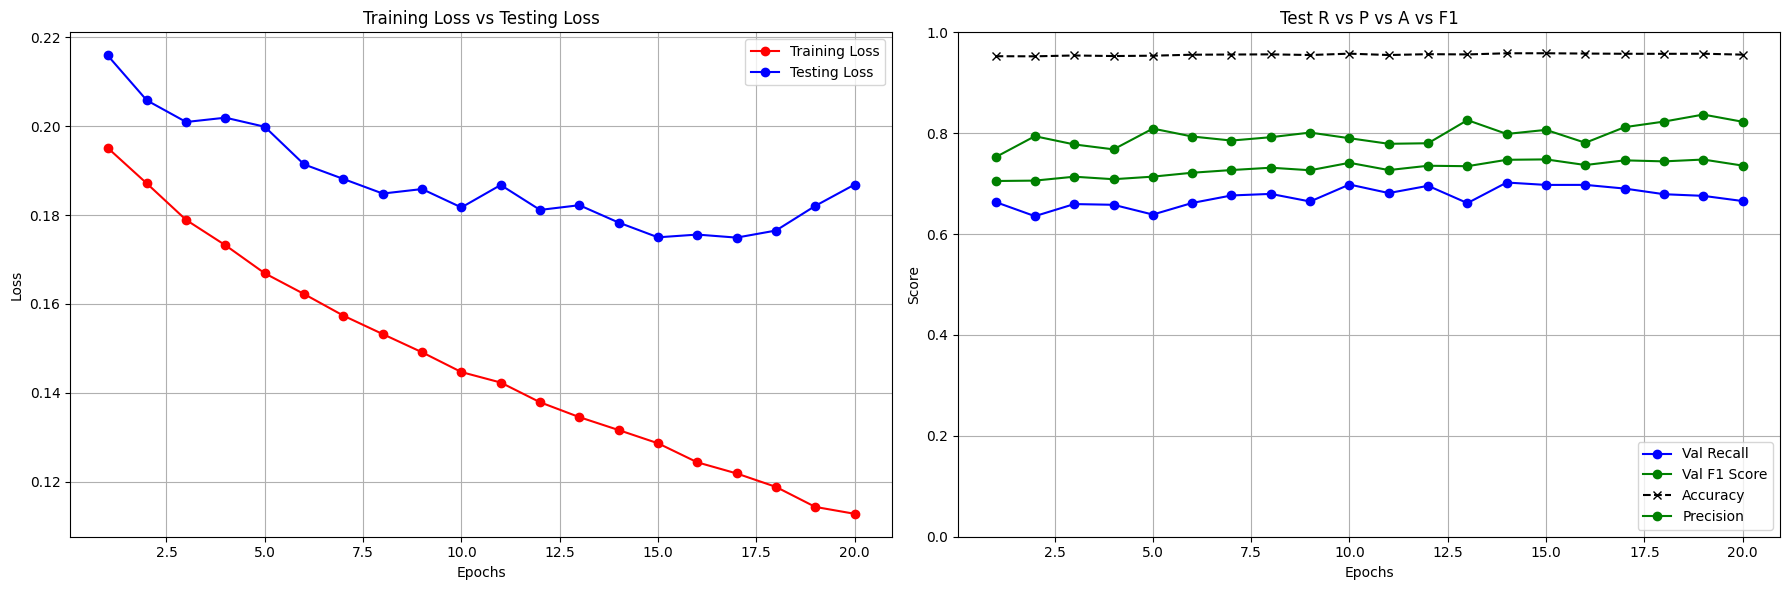

In [43]:
# plot evaluation metrics
plot_training_metrics(history_v4_1)

Observation: Continuing training for 20 more epoches lead to higher recall of 70.22% and F1 of 74.73% at epoch 17 with accuracy of 94.85%. However, the model is an overfit.

Trying an approach where increasing the capacity further but training for fewer epoches.

In [44]:
#increasing dimension of hidden layer more without using weighted loss
lstm_nre_v5 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480).to(device)
optimizer_v5 = torch.optim.Adam(lstm_nre_v5.parameters(), lr=1e-4)

In [45]:
history_v5 = train_eval_lstm(lstm_nre_v5, optimizer_v5, n_epoches = 30)

Starting Bi-LSTM for NER training...
Epoch 1/30 | Train Loss: 1.4929 | Test Loss: 0.6095 | Test Recall: 0.0000 | Test Precision: 0.0000 |Test F1: 0.0000 |Test Accuracy: 0.8715
Epoch 2/30 | Train Loss: 0.5953 | Test Loss: 0.5211 | Test Recall: 0.0004 | Test Precision: 0.0242 |Test F1: 0.0007 |Test Accuracy: 0.8720
Epoch 3/30 | Train Loss: 0.4770 | Test Loss: 0.4035 | Test Recall: 0.1314 | Test Precision: 0.3085 |Test F1: 0.1843 |Test Accuracy: 0.9039
Epoch 4/30 | Train Loss: 0.3665 | Test Loss: 0.3274 | Test Recall: 0.2944 | Test Precision: 0.5971 |Test F1: 0.3944 |Test Accuracy: 0.9267
Epoch 5/30 | Train Loss: 0.3034 | Test Loss: 0.2887 | Test Recall: 0.3948 | Test Precision: 0.6847 |Test F1: 0.5008 |Test Accuracy: 0.9358
Epoch 6/30 | Train Loss: 0.2642 | Test Loss: 0.2590 | Test Recall: 0.4482 | Test Precision: 0.7175 |Test F1: 0.5517 |Test Accuracy: 0.9400
Epoch 7/30 | Train Loss: 0.2373 | Test Loss: 0.2382 | Test Recall: 0.5027 | Test Precision: 0.7584 |Test F1: 0.6046 |Test Accurac

/tmp/ipython-input-483565873.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


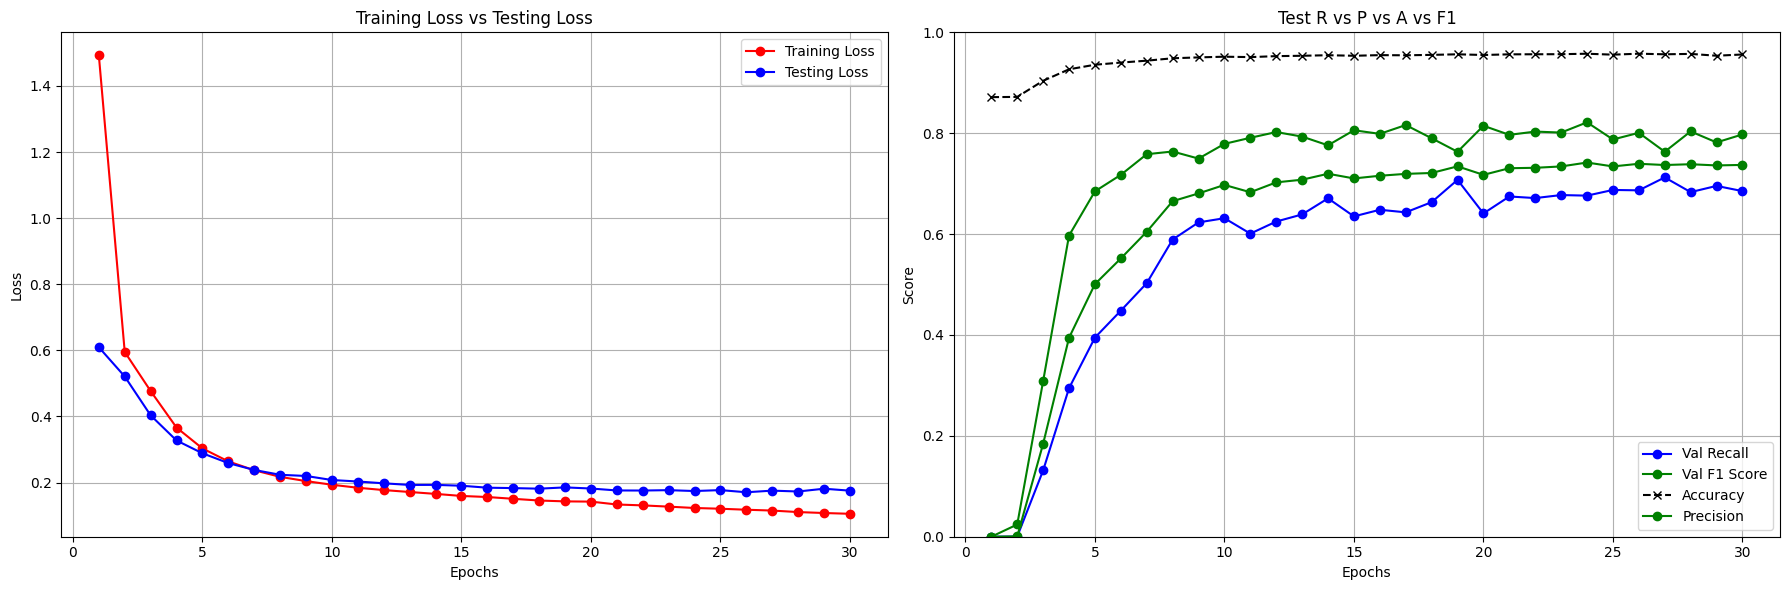

In [46]:
# plot evaluation metrics
plot_training_metrics(history_v5)

Observation: After epoch 10 the model is learning slowly but could reach 71.24% recall and 73.69% F1 score at epoch 27 however, the recall dropped after that. Some amount of overfitting is seen.

Adding dropout layers to reduce overfitting.

In [53]:
#adding dropout layer to reduce overfitting
lstm_nre_v6 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480, dropout_rate=0.2).to(device)
optimizer_v6 = torch.optim.Adam(lstm_nre_v6.parameters(), lr=1e-4)

In [54]:
history_v6 = train_eval_lstm(lstm_nre_v6, optimizer_v6, n_epoches = 27)

Starting Bi-LSTM for NER training...


/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/27 | Train Loss: 1.5040 | Test Loss: 0.6105 | Test Recall: 0.0000 | Test Precision: 0.0000 |Test F1: 0.0000 |Test Accuracy: 0.8715
Epoch 2/27 | Train Loss: 0.5804 | Test Loss: 0.5035 | Test Recall: 0.0005 | Test Precision: 0.0163 |Test F1: 0.0010 |Test Accuracy: 0.8727
Epoch 3/27 | Train Loss: 0.4547 | Test Loss: 0.3933 | Test Recall: 0.1777 | Test Precision: 0.4240 |Test F1: 0.2504 |Test Accuracy: 0.9105
Epoch 4/27 | Train Loss: 0.3553 | Test Loss: 0.3302 | Test Recall: 0.3000 | Test Precision: 0.6109 |Test F1: 0.4024 |Test Accuracy: 0.9268
Epoch 5/27 | Train Loss: 0.2966 | Test Loss: 0.2971 | Test Recall: 0.4023 | Test Precision: 0.6724 |Test F1: 0.5034 |Test Accuracy: 0.9355
Epoch 6/27 | Train Loss: 0.2588 | Test Loss: 0.2668 | Test Recall: 0.4602 | Test Precision: 0.7162 |Test F1: 0.5604 |Test Accuracy: 0.9397
Epoch 7/27 | Train Loss: 0.2338 | Test Loss: 0.2428 | Test Recall: 0.5145 | Test Precision: 0.7553 |Test F1: 0.6121 |Test Accuracy: 0.9440
Epoch 8/27 | Train Loss: 0.

/tmp/ipython-input-483565873.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


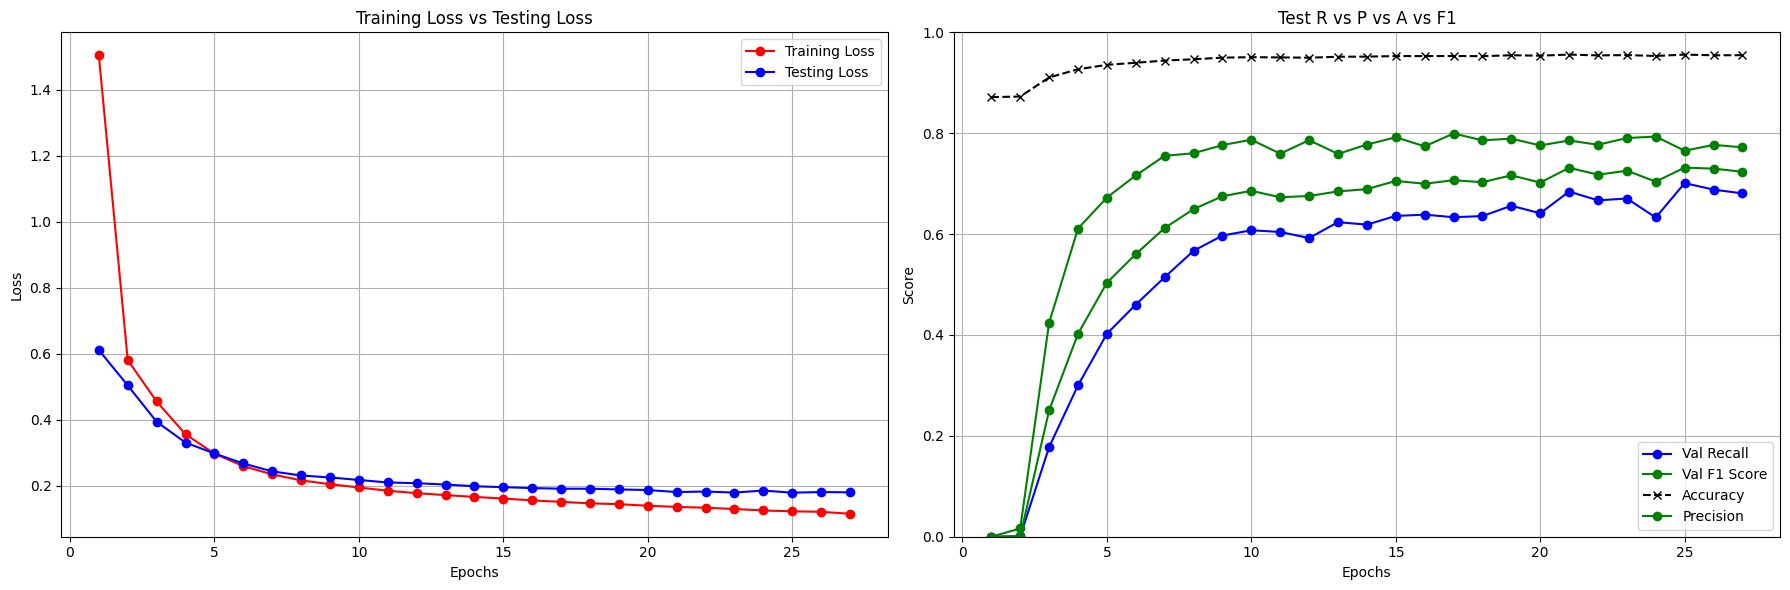

In [55]:
# plot evaluation metrics
plot_training_metrics(history_v6)

Observation: Overfitting is slightly reduced at epoch 25 with R: 70.11%, P: 76.53%, F1: 73.18% and A: 95.59%

### 5. LegalBERT Finetuning (Liza)

Using legalBERT tokenizer

In [ ]:
#add for legalBERT
# tokenizer_legalbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
# train_legalbert = preprocess_data(df_train ,tokenizer_legalbert)
# test_legalbert = preprocess_data(df_test, tokenizer_legalbert)
# validation_legalbert = preprocess_data(df_validation, tokenizer_legalbert)

### 7. DistilBERT Finetuning (Mit)

Using tokenized datasets: train_distilbert, test_distilbert, validation_distilbert

### 8. Pre-trained DistilBERT - Benchmarking (Sayed)

Using tokenized datasets: train_distilbert, test_distilbert, validation_distilbert

### 9. RoBERTa, BERT-NER, ALBERT
These are some more models that can be used. Feel free to pick any and start working